In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor,Ridge,Lasso,ElasticNet,LogisticRegression

# Linear Regression

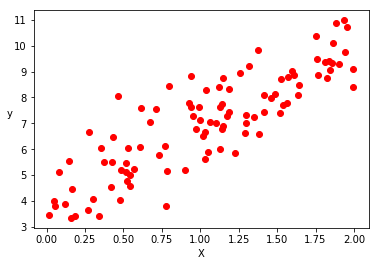

In [2]:
X = 2*np.random.rand(100,1) # The higher the coeff, the more straight, and identical the data
y = 4 + 3*X + np.random.randn(100,1)
plt.plot(X,y,'ro')
plt.xlabel('X')
plt.ylabel('y', rotation=0)
plt.show()

Normal Equation

In [3]:
X_i = np.concatenate((np.ones((100,1)),X),axis=1)
theta_opt_ne = np.linalg.inv(X_i.transpose().dot(X_i)).dot(X_i.transpose()).dot(y)
theta_opt_ne


array([[3.98969071],
       [2.93045974]])

yhat = [[3.98969071]
 [9.85061018]]


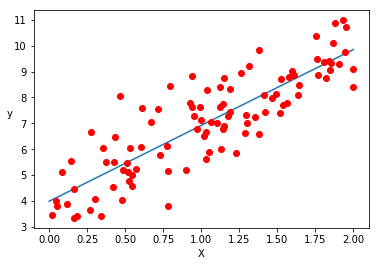

In [4]:
X_sample = np.array([[0],[2]]) # Beginning and end of the line on the x axis
X_sample_i = np.concatenate((np.ones((2,1)),X_sample), axis =1)
y_hat = X_sample_i.dot(theta_opt_ne)
print ('yhat =',y_hat)
plt.plot(X_sample,y_hat)
plt.plot(X,y,'ro')
plt.xlabel('X')
plt.ylabel('y', rotation=0)
plt.show()

In [5]:
lr = LinearRegression().fit(X,y)
yhat = lr.predict(X)
yhat_sample = lr.predict(X_sample)
print ('(Beg and end of line)yhat =',yhat_sample)
print ('First 5 elements of y and yhat, predicted by LR =\n',y[:5],'\n',yhat[:5])
print ('Linear Regression Score = ',lr.score(X[:5],y[:5]))
theta0, theta1 = lr.intercept_,lr.coef_
# print (lr.get_params)
print (theta0,theta1)

(Beg and end of line)yhat = [[3.98969071]
 [9.85061018]]
First 5 elements of y and yhat, predicted by LR =
 [[8.4006681 ]
 [5.99461257]
 [3.34817858]
 [6.6012245 ]
 [4.76512957]] 
 [[7.28419822]
 [7.30046633]
 [4.46307414]
 [8.03481589]
 [5.52410805]]
Linear Regression Score =  0.5299971815816417
[3.98969071] [[2.93045974]]


Gradient Descent - Training SGDRegressor 

In [6]:
sgd = SGDRegressor().fit(X,np.ravel(y)) # required shape for y is (n_samples,)
sgd_theta0, sgd_theta1 = sgd.intercept_,sgd.coef_
print ('theta',sgd_theta0,sgd_theta1)

theta [3.11937334] [3.4007904]


C:\Users\afamili001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Polynomial Regression

(100, 2)


Text(0, 0.5, 'y')

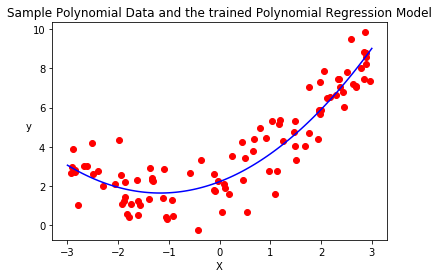

In [12]:
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) # Quadratic Function
print (X_poly.shape)
lr_poly = LinearRegression().fit(X_poly,y)
theta0,theta = lr_poly.intercept_,lr_poly.coef_
X_sample = np.linspace(-3,3,100).reshape(100,1) # scaled to be plotted in the same area
X_sample_poly = poly_features.transform(X_sample)
yhat_poly = lr_poly.predict(X_sample_poly)
# print (yhat_poly)
# print (X_sample_poly)
plt.plot(X,y,'ro')
plt.plot(X_sample,yhat_poly,'b-')
plt.title('Sample Polynomial Data and the trained Polynomial Regression Model')
plt.xlabel('X')
plt.ylabel('y',rotation=0)

Learning Curves

Regularized Linear Models
- Ridge
- LASSO -- Equivalent to feature selection
- Elastic Net

In [18]:
# alpha = 1 seems to be the most appropriate alg; not underfitting or overfitting the data
ridge_reg = Ridge(alpha = 1,solver='cholesky',random_state=42).fit(X,y)
print ('Ridge Prediction =',ridge_reg.predict([[1.5]]))
lasso = Lasso(alpha =0.001).fit(X,y)
print ('Lasso prediction =',lasso.predict([[1.5]]))
en = ElasticNet(alpha=0.1).fit(X,y)
print ('Elastic prediction =',en.predict([[1.5]]))

Ridge Prediction = [[5.30493664]]
Lasso prediction = [5.30845746]
Elastic prediction = [5.27126666]


Logistic Regression

(250, 4)


C:\Users\afamili001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


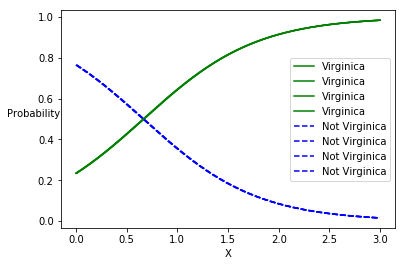

In [153]:
# Binary Classification with Logistic Regression
X,target = datasets.load_iris(return_X_y = True)
y_bin = (target == 2).astype(int)
logr_bin = LogisticRegression().fit(X,y_bin)
X_bin = np.linspace(0,3,1000).reshape(-1,4)
print (X_bin.shape)
y_proba_bin = logr_bin.predict_proba(X_bin)
plt.plot(X_bin,y_proba_bin[:,1],'g-',label = 'Virginica')
plt.plot(X_bin,y_proba_bin[:,0],'b--',label = 'Not Virginica')
plt.xlabel('X')
plt.ylabel('Probability',rotation = 0)
plt.legend(loc = 'center right')
# y_proba_bin
# plt.plot(X_bin,)

In [160]:
# Multi-Class Classification with Logistic Regression
# solver = Optimization algorithm, minimizing the cost function (Cross Entropy)
# C (1/eta) = hyperparameter, determining the degree of complexity of the model -- the lower the C, the higher the regularization degree
logr = LogisticRegression(multi_class = 'multinomial',solver = 'newton-cg',C = 10).fit(X,y) # Softmax Regression
y_pred = logr.predict(X)
log_proba_pred = logr.predict_log_proba(X)
print ('log prob =',log_proba_pred[120:])
print ('y_pred =',y_pred[120:])
print ('y =',y[120:])
sc = logr.score(X,y)
print ('acc = %.2f'%(sc))

log prob = [[-7.14185059e+00 -7.91599624e-04]
 [-3.69935143e+00 -2.50507324e-02]
 [-1.02997847e+01 -3.36409028e-05]
 [-1.44894703e+00 -2.67640797e-01]
 [-5.84236217e+00 -2.90619845e-03]
 [-4.76060525e+00 -8.59727751e-03]
 [-1.00217000e+00 -4.57414420e-01]
 [-1.19806119e+00 -3.59219229e-01]
 [-6.99981665e+00 -9.12465345e-04]
 [-2.69458670e+00 -6.99615220e-02]
 [-6.63469253e+00 -1.31484673e-03]
 [-5.80397815e+00 -3.02009048e-03]
 [-7.71652608e+00 -4.45504446e-04]
 [-6.73550104e-01 -7.13135992e-01]
 [-3.05756132e+00 -4.81426615e-02]
 [-8.47154340e+00 -2.09363471e-04]
 [-7.91033664e+00 -3.66998372e-04]
 [-3.57873971e+00 -2.83077625e-02]
 [-9.37092606e-01 -4.97194282e-01]
 [-4.20695085e+00 -1.50037009e-02]
 [-7.88245452e+00 -3.77377013e-04]
 [-3.89449744e+00 -2.05635896e-02]
 [-4.01090178e+00 -1.82831735e-02]
 [-8.49468601e+00 -2.04573400e-04]
 [-8.70832674e+00 -1.65218100e-04]
 [-5.07230733e+00 -6.28766724e-03]
 [-3.00844723e+00 -5.06285439e-02]
 [-3.32160949e+00 -3.67622163e-02]
 [-6.2117

Summary:

Linear Regression - Compute theta(coef_) through:
    1. Normal Equation - formula provided 
    2. Gradient Descent - Minimizes the cost function (finding the global minimum)
        - Batch: computes gradients on the whole batch of training set => could be super slow
        - Stochastic: computes gradients on a random instance of training set => bounces around and might not reach the global min and might not stay in it => simualated annealing (set appropriate learning rate; start big (to pass local minima), and then decrease),learning schedule(determines learning rate at each step)
        - Mini-Batch: computes gradients on small random sets of instances
    3. Learning Curves
    4. Regularizing the Model= constraining it, reducing deg of freedom to prevent overfitting (by penalizing some of the features)
        - eta hyperparameter in Linear Regression
        - C =1/eta hyperparameter in Logistic Regression